In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset_raw = pd.read_csv('/Users/angadbawa/Development/Dep/UCIdataset/realData - data.csv')
print(dataset_raw.shape)
dataset_raw.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# create copy of dataset 
dataset = dataset_raw.copy()
dataset.shape

(4424, 37)

In [5]:
# getting rid of enrolled data 
dataset.drop(dataset[dataset["Target"] == "Enrolled"].index, inplace=True)

#eliminating unecessary columns 

# List of columns to be eliminated
cols_eliminate = ['Marital status', 'Application order', 'Course', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)','Previous qualification (grade)','Admission grade']

# Drop columns only if they exist in the DataFrame
dataset.drop(columns=[col for col in cols_eliminate if col in dataset.columns], inplace=True)

dataset.head()

,Application mode,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,17,1,1,1,19,12,5,9,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,15,1,1,1,1,3,3,3,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,1,1,1,37,37,9,9,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,17,1,1,1,38,37,5,3,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,39,0,1,1,37,38,9,9,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate


In [6]:
target = dataset['Target']
features = dataset.drop(['Target'], axis=1)
target.shape, features.shape

print(dataset.columns)

Index(['Application mode', 'Daytime/evening attendance',
       'Previous qualification', 'Nacionality', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')


In [7]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = 2304)
for tr_idx, te_idx in kf.split(features):
    X_train, X_test = features.iloc[tr_idx], features.iloc[te_idx]
    y_train, y_test = target.iloc[tr_idx], target.iloc[te_idx]
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3267, 19), (363, 19), (3267,), (363,))

Here we encode the target variable as we have 0 1 2 

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(y_train)
y_train = le.fit_transform(y_train)
print(y_train[:10])

y_test = le.fit_transform(y_test)
print(y_test[:10])


0        Dropout
3       Graduate
4       Graduate
5       Graduate
6       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 3267, dtype: object
[0 1 1 1 1 0 1 0 1 1]
[1 0 1 0 1 0 1 1 1 1]


In [9]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print("testing score: ")
print(model.score(X_test, y_test))

pred_label = model.predict(X_test)
pred_label[:20]

0.9387817569635751
testing score: 
0.7520661157024794


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [10]:
y_test[:20]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [11]:
classes=np.unique(y_train)
classes

array([0, 1])

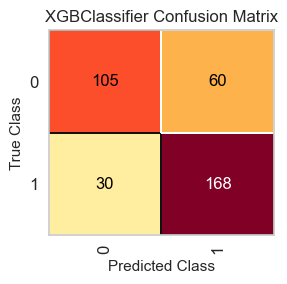

In [12]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(3, 3))
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes)
plt.show()

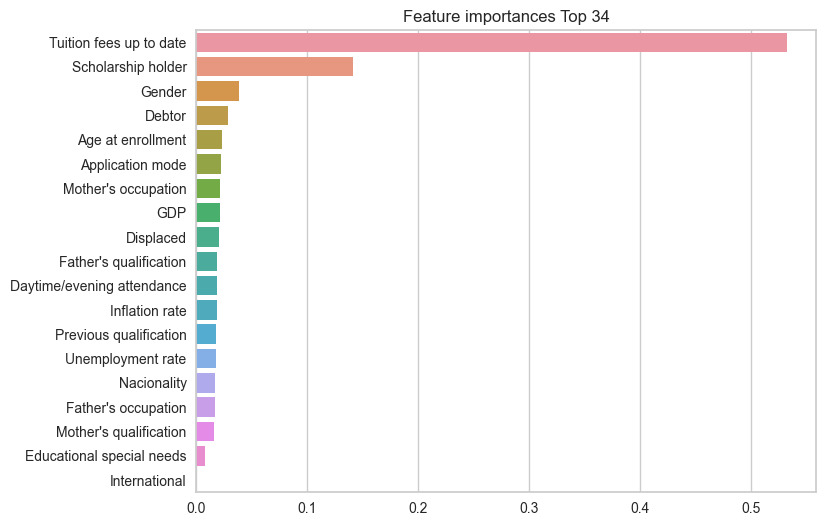

In [13]:
import seaborn as sns

XGBClassifier_importances_values = model.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index=X_train.columns)

XGBClassifier_top34 = XGBClassifier_importances.sort_values(ascending=False)[:34]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 34')
sns.barplot(x=XGBClassifier_top34 , y = XGBClassifier_top34.index)
plt.show()

SMOTE: 
Technique for handling imbalanced datasets, where u synthetically generate minority class points to balance the dataset 

In [14]:
import imblearn
print(imblearn.__version__)

0.11.0


In [15]:
#we perform oversampling on the imbalanced dataset
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from collections import Counter

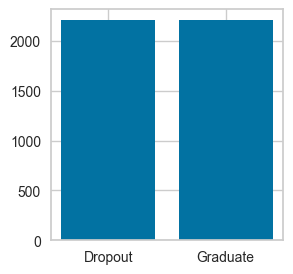

In [16]:


# Oversample the data using SMOTE
oversample = SMOTE()
features_2, target_2 = oversample.fit_resample(features,target)

# Summarize distribution
counter = Counter(target_2)

# Plot the distribution
plt.figure(figsize=(3, 3))
plt.bar(counter.keys(), counter.values())
plt.show()


# **Modelling with Balanced Data **


This loop iterates through the fold indices generated by the KFold object's split() method. For each fold, it splits the features (features_2) and target variables (target_2) into training and testing sets:

tr_idx: The indices of the training data for the current fold.
te_idx: The indices of the testing data for the current fold.

In [17]:
#kfold is some cross validation technique 
from sklearn.model_selection import train_test_split,KFold

kf = KFold(n_splits=10,shuffle=True,random_state= 2304)
for tr_idx, te_idx in kf.split(features_2):
    X_train_2, X_test_2 = features_2.iloc[tr_idx], features_2.iloc[te_idx]
    y_train_2, y_test_2 = target_2.iloc[tr_idx], target_2.iloc[te_idx]
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((3977, 19), (441, 19), (3977,), (441,))

Using label encoder to turn categorical values into numerical respresentations

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_2 = le.fit_transform(y_train_2)
print(y_train_2[:10])

y_test_2 = le.fit_transform(y_test_2)
print(y_test_2[:10])

[0 1 1 1 1 0 1 1 1 1]
[1 0 0 1 0 1 0 0 0 1]


In [19]:
#trained & tested on balanced data
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train_2, y_train_2)

print(model.score(X_train_2, y_train_2))
print(model.score(X_test_2, y_test_2))

pred_label = model.predict(X_test_2)
pred_label[:20]

0.9504651747548404
0.800453514739229


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

Now we test the original data, after the model is trained on the balanced data 

In [20]:
# apply to original data with smote data training 

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=2304, eval_metric='mlogloss', use_label_encoder=False) #
model.fit(X_train_2, y_train_2)
print("Training score")
print(model.score(X_train_2, y_train_2))
print("Testing score")
print(model.score(X_test, y_test))
print("")
pred_label = model.predict(X_test)
pred_label[:20]

Training score
0.9504651747548404
Testing score
0.8567493112947658


array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

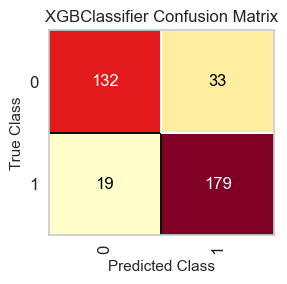

In [21]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(3, 3))
confusion_matrix(model, X_train_2, y_train_2, X_test, y_test, classes=classes)
plt.show()

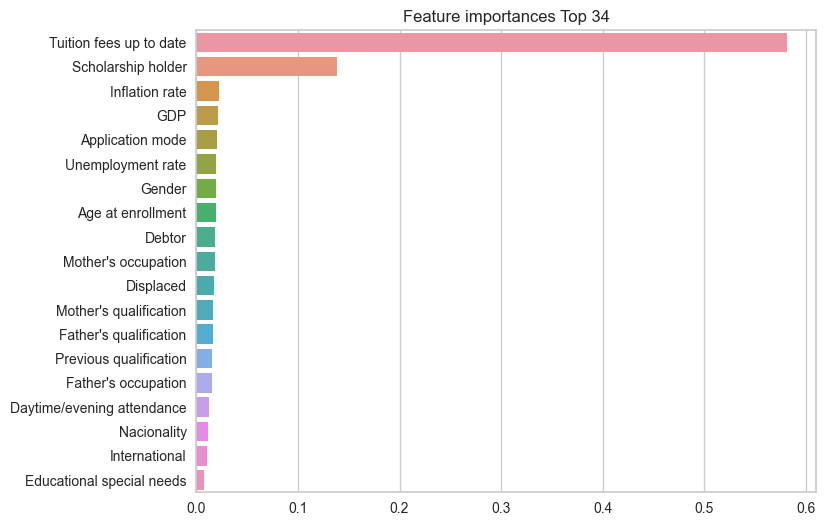

In [22]:
import seaborn as sns

XGBClassifier_importances_values = model.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index=X_train_2.columns)

XGBClassifier_top34 = XGBClassifier_importances.sort_values(ascending=False)[:34]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 34')
sns.barplot(x=XGBClassifier_top34 , y = XGBClassifier_top34.index)
plt.show()